# Insurance features `bin`, `pcn`, `group` exploration

We explore how these three features `bin`, `pcn`, `group`, which provide information about medical insurance affect `patient_pay`. When controlling for drug, `bin` does not differentiate people . In particular, looking at a single drug `monemodiase`, which has the highest average pay, we see that `pcn` and `group` are able to differentiate between higher copay and low copay.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('pharmacy_tx.csv')

In [3]:
df

,tx_date,pharmacy,diagnosis,drug,bin,pcn,group,rejected,patient_pay
0,2022-01-02,Pharmacy #6,G99.93,branded tanoclolol,725700,1UQC,NaN,False,13.39
1,2022-01-02,Pharmacy #42,U60.52,branded oxasoted,664344,NaN,52H8KH0F83K,False,7.02
2,2022-01-02,Pharmacy #37,Q85.91,branded cupitelol,725700,1UQC,NaN,False,13.39
3,2022-01-02,Pharmacy #30,U60.52,generic oxasoted,571569,KB38N,6BYJBW,False,10.84
4,2022-01-02,Pharmacy #18,N55.01,branded mamate,664344,NaN,ZX2QUWR,False,47.00
...,...,...,...,...,...,...,...,...,...
13910239,2022-12-30,Pharmacy #42,U27.71,branded colifunene,322463,NaN,HO8HUGL,True,0.00
13910240,2022-12-30,Pharmacy #45,N59.44,generic tafistitrisin,664344,NaN,TFZOR5R49,False,6.28
13910241,2022-12-30,Pharmacy #54,W50.87,generic tanoclolol,691847,N098KI,6SP1DG,False,6.94
13910242,2022-12-30,Pharmacy #0,I68.27,branded prazinib,96934,S76J7V6,NaN,False,13.93


In [36]:
df[['type', 'drug']]=df['drug'].str.split(' ', expand = True)

In [31]:
df['log_patient_pay'] = np.log(df.patient_pay)

/opt/homebrew/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,tx_date,pharmacy,diagnosis,drug,bin,pcn,group,rejected,patient_pay,log_patient_pay,type
0,2022-01-02,Pharmacy #6,G99.93,tanoclolol,725700,1UQC,NaN,False,13.39,2.594508,branded
1,2022-01-02,Pharmacy #42,U60.52,oxasoted,664344,NaN,52H8KH0F83K,False,7.02,1.948763,branded
2,2022-01-02,Pharmacy #37,Q85.91,cupitelol,725700,1UQC,NaN,False,13.39,2.594508,branded
3,2022-01-02,Pharmacy #30,U60.52,oxasoted,571569,KB38N,6BYJBW,False,10.84,2.383243,generic
4,2022-01-02,Pharmacy #18,N55.01,mamate,664344,NaN,ZX2QUWR,False,47.00,3.850148,branded
...,...,...,...,...,...,...,...,...,...,...,...
13910239,2022-12-30,Pharmacy #42,U27.71,colifunene,322463,NaN,HO8HUGL,True,0.00,-inf,branded
13910240,2022-12-30,Pharmacy #45,N59.44,tafistitrisin,664344,NaN,TFZOR5R49,False,6.28,1.837370,generic
13910241,2022-12-30,Pharmacy #54,W50.87,tanoclolol,691847,N098KI,6SP1DG,False,6.94,1.937302,generic
13910242,2022-12-30,Pharmacy #0,I68.27,prazinib,96934,S76J7V6,NaN,False,13.93,2.634045,branded


In [24]:
df.bin.unique()

array([725700, 664344, 571569,  96934, 539437, 322463, 757349, 691847,
       160389, 956971, 718350, 756120])

In [25]:
df.pcn.unique()

array(['1UQC', nan, 'KB38N', 'S76J7V6', '327CKV', 'CS8580', 'MSCXSG',
       'NC7EN', 'KBOSN', '3O71UTS', 'ZQPX', 'T52GV', 'N098KI', 'DY4B',
       'AZUO5U', '3Y5ZW0', 'RB7UU', 'RM0HB', 'BIZF', 'RAM3J', 'TAZ5W',
       'WM6A', 'J5DT8', 'YFVIA', 'W1LW9Y', 'OO0E', 'BZ22Z2', 'P4LC',
       '6ZGS97C', '9D24', 'T17LNK', 'TPJD', 'REGLCC', 'YICC41', 'XH4T3',
       '7THOQ5', 'CG3ZWQ', 'IF448', 'NG4CS', '2TIC', 'MQWH09H', '393U',
       '9C5MOR3', 'YL5CMT', '9FU70', 'ULM7G', 'W7L3', 'K5KDJ7G', 'FX2Z'],
      dtype=object)

In [26]:
df.group.unique()

array([nan, '52H8KH0F83K', '6BYJBW', 'ZX2QUWR', 'IOEAN1DWVV3Y', '1CAHL',
       'HO8HUGL', 'STGRDKR1J5RD', 'DGLGRYP', 'I4UYEP84W3',
       'KZWQDIHCLLHD1', 'EVD4X5', '6SP1DG', 'IGN6JL34H37D', 'RS5RB3YA',
       'SJVO3GXUURRGO', 'QK6BI1N61', '7DUPMODV0', 'T51T6V2E8L', 'L9QZA',
       'IX6P0', 'AJK5MZ25T9IA', '0OGKQ', 'HPVSQW7M8', 'ZOYKF0N5NEO',
       'O19XSLDEFB', 'VC81HUO7ZD', 'YY6B1J4E8KJ3', 'DYGBI610ZY',
       'Z01MLD4I', '7LL04USF', 'BH2Q8B3GY2GAV', 'MP3IQ', '9R3Z3QKDF3',
       'GOM8K0', 'FZPLF4O6FD', 'GQIGYFQQ2WGH', 'XK8RM5E75ZW',
       '0TZ9XYJZJH', '7Q756WMLLV25X', 'XY5GQQ9', 'S2QKZ0OFNWS6X',
       'U19J4RVCA', 'RGVK1', 'V96T9QL5', '77MAJF66DGD', 'TFZOR5R49',
       '1N5IRQ', 'OD99VAJGWV'], dtype=object)

In [18]:
df.groupby('bin')['pcn'].nunique()

bin
96934      2
160389     1
322463     7
539437     2
571569     4
664344    14
691847     8
718350     1
725700     5
756120     1
757349     2
956971     1
Name: pcn, dtype: int64

In [19]:
df.groupby('bin')['group'].nunique()

bin
96934      1
160389     1
322463     6
539437     2
571569     4
664344    17
691847     7
718350     1
725700     5
756120     0
757349     3
956971     1
Name: group, dtype: int64

In [23]:
df.groupby('bin').patient_pay.mean()

bin
96934     25.240159
160389    26.546326
322463    16.612910
539437    27.470969
571569    24.278225
664344    24.073866
691847    24.613657
718350    27.638313
725700    27.834020
756120    28.920944
757349    27.943799
956971    28.168355
Name: patient_pay, dtype: float64

<AxesSubplot:>

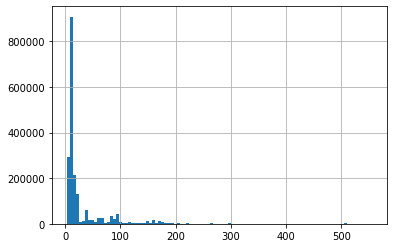

In [34]:
df.loc[(df.bin==725700)&(df.rejected==False)].patient_pay.hist(bins=100)

<AxesSubplot:>

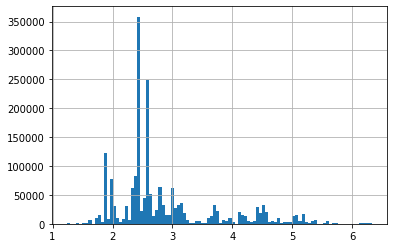

In [35]:
df.loc[(df.bin==725700)&(df.rejected==False)].log_patient_pay.hist(bins=100)

<AxesSubplot:>

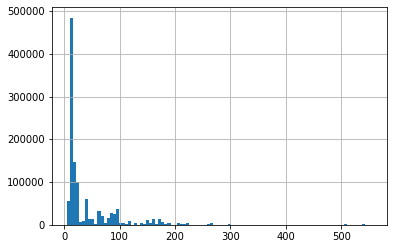

In [38]:
df.loc[(df.bin==725700)&(df.rejected==False)&(df.type=='branded')].patient_pay.hist(bins=100)

<AxesSubplot:>

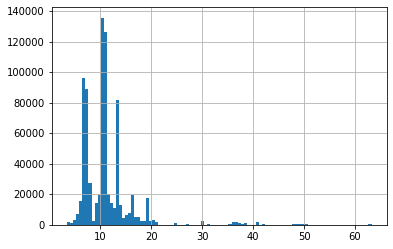

In [39]:
df.loc[(df.bin==725700)&(df.rejected==False)&(df.type=='generic')].patient_pay.hist(bins=100)

<AxesSubplot:>

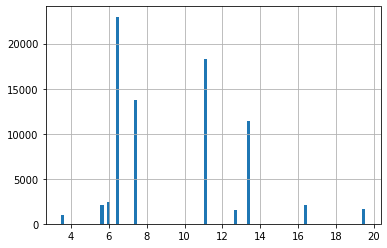

In [41]:
df.loc[(df.bin==725700)&(df.rejected==False)&(df.drug=='tanoclolol')].patient_pay.hist(bins=100)

<AxesSubplot:>

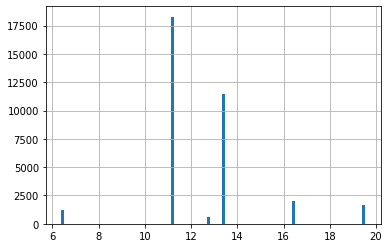

In [50]:
df.loc[(df.bin==725700)&(df.rejected==False)&(df.drug=='tanoclolol')&(df.type=='branded')].patient_pay.hist(bins=100)

<AxesSubplot:>

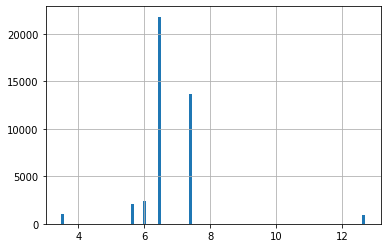

In [48]:
df.loc[(df.bin==725700)&(df.rejected==False)&(df.drug=='tanoclolol')&(df.type=='generic')].patient_pay.hist(bins=100)

<AxesSubplot:>

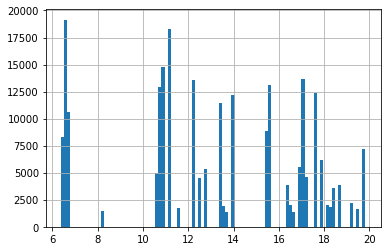

In [51]:
df.loc[(df.rejected==False)&(df.drug=='tanoclolol')&(df.type=='branded')].patient_pay.hist(bins=100)

<AxesSubplot:>

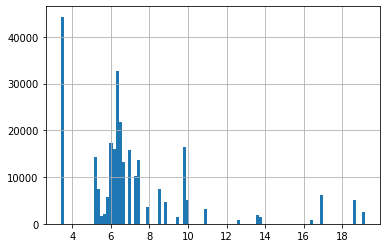

In [52]:
df.loc[(df.rejected==False)&(df.drug=='tanoclolol')&(df.type=='generic')].patient_pay.hist(bins=100)

In [58]:
drugmeans = pd.DataFrame({'mean':df.groupby('drug').patient_pay.mean()}).reset_index()

In [60]:
drugmeans.sort_values(by='mean')

,drug,mean
25,glycontazepelol,9.657907
27,gorol,9.856005
67,tanoclolol,9.877030
48,oxasoted,9.916758
19,foxivelule,10.116298
...,...,...
17,flacelfatastat,138.605000
39,masonic,139.050168
53,prefluflomycin,157.536435
49,pheromycin,250.156384


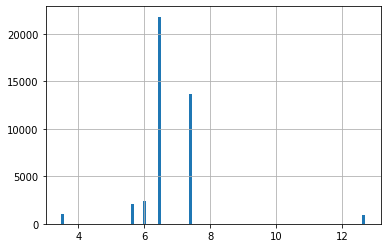

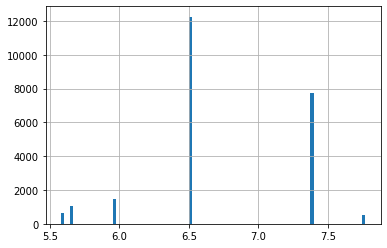

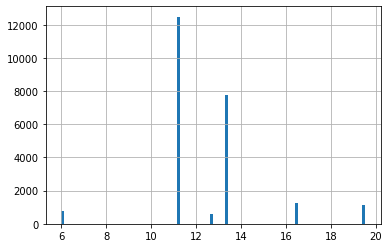

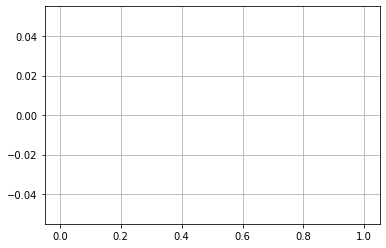

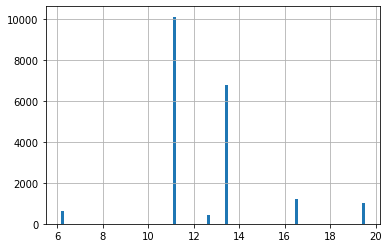

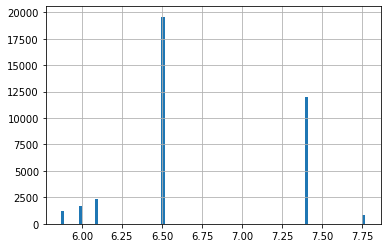

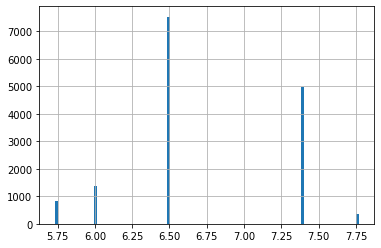

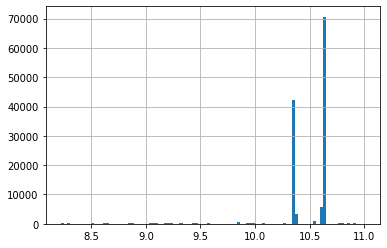

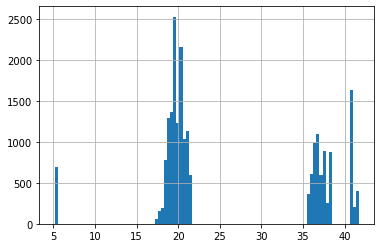

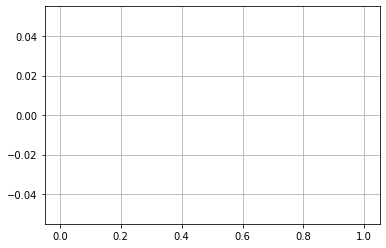

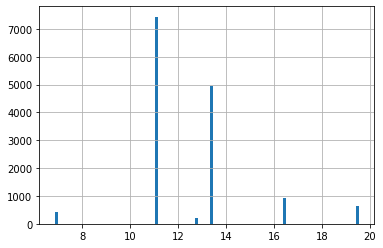

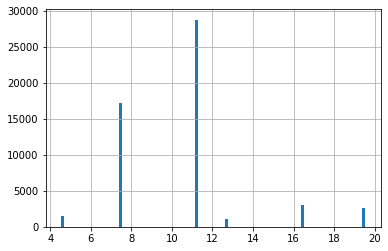

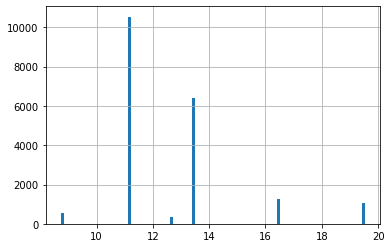

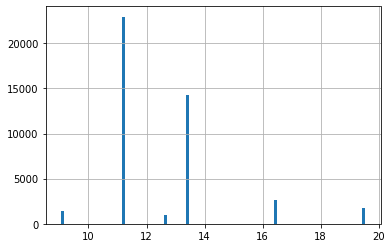

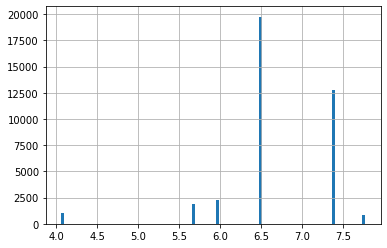

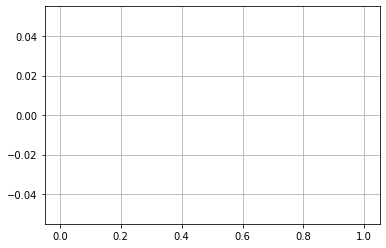

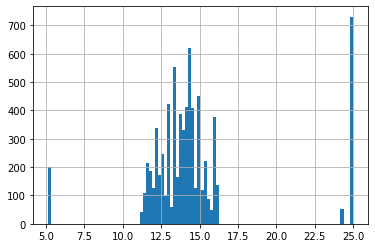

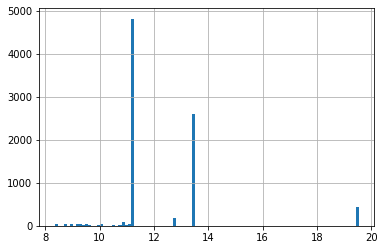

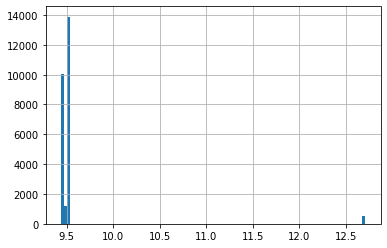

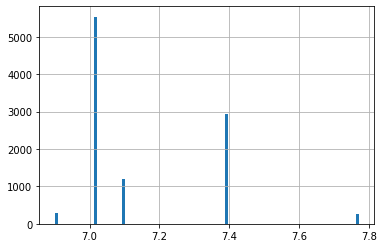

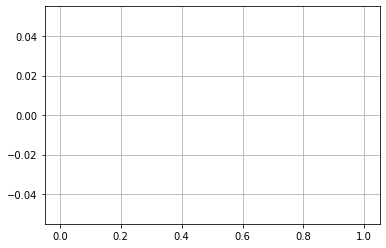

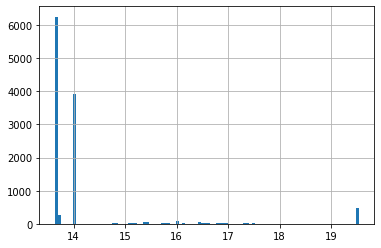

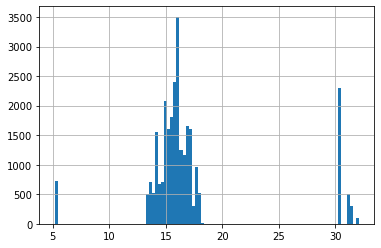

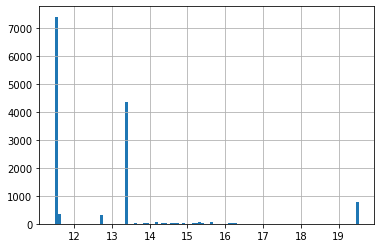

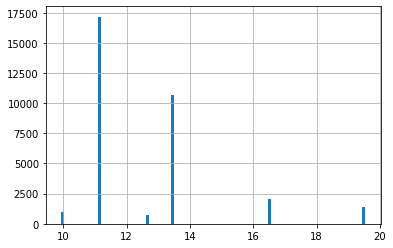

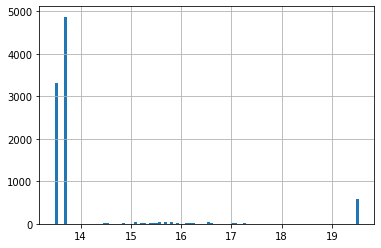

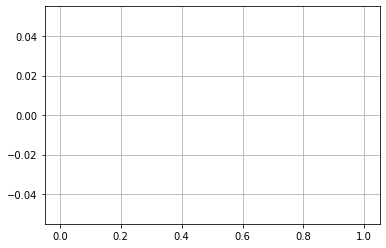

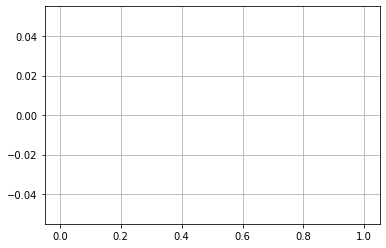

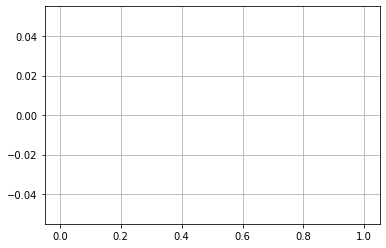

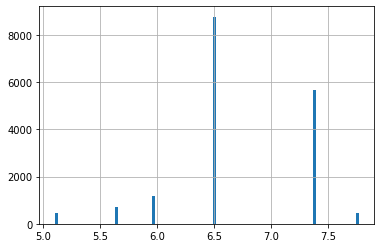

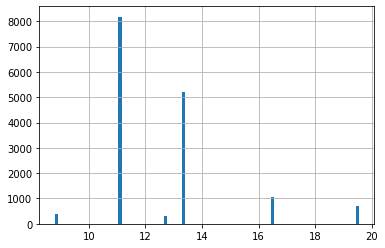

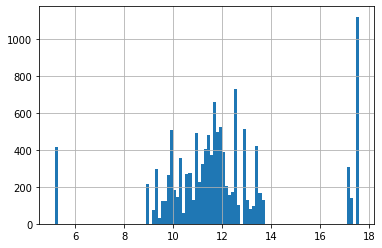

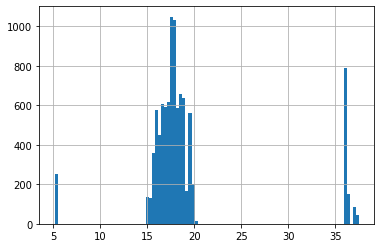

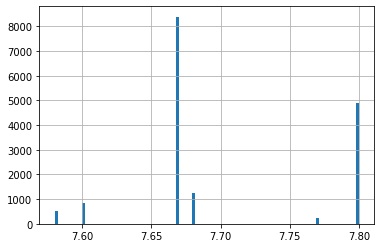

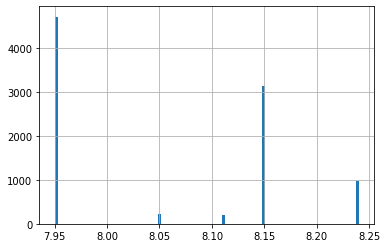

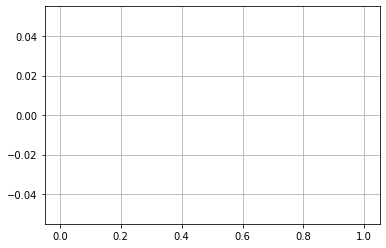

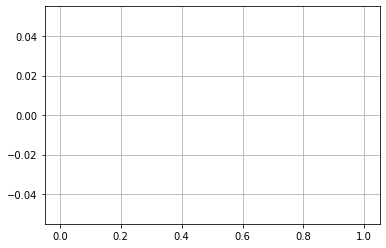

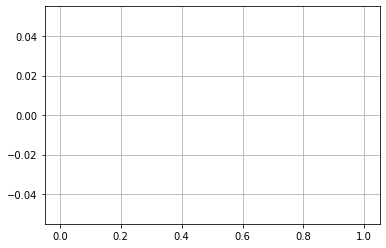

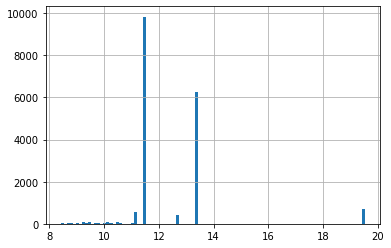

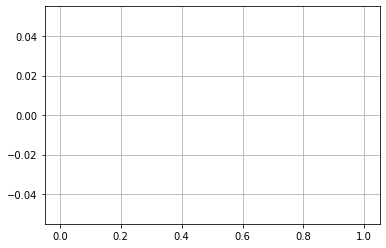

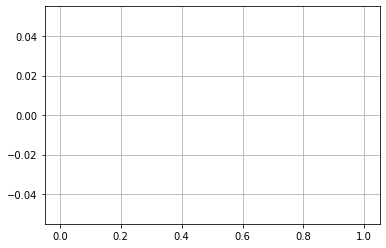

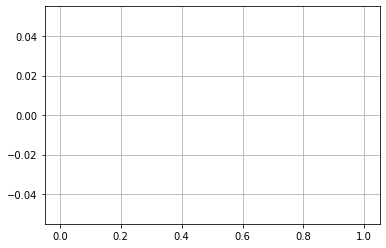

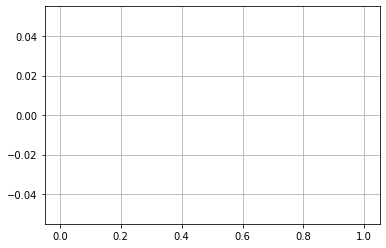

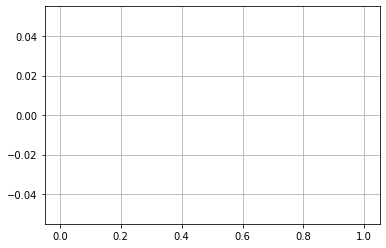

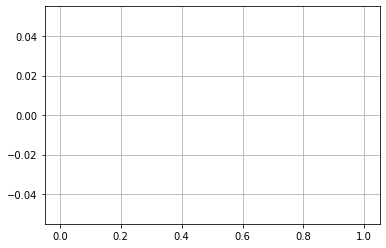

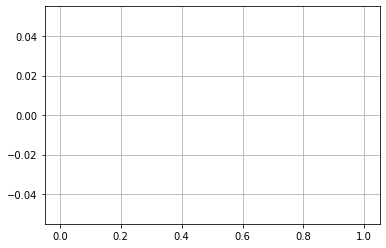

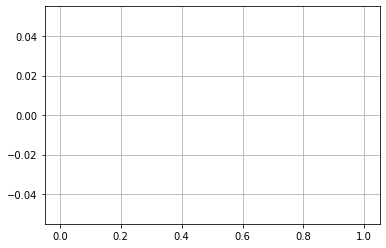

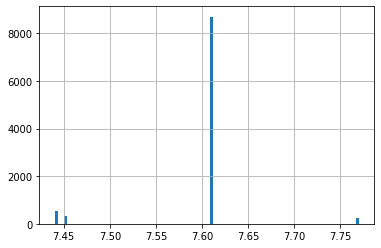

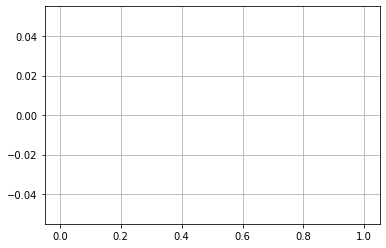

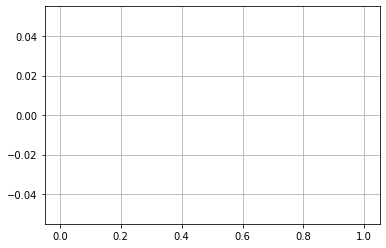

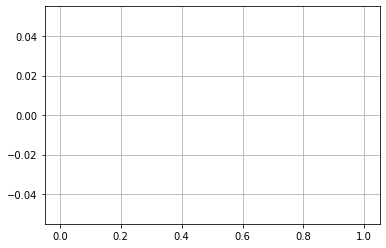

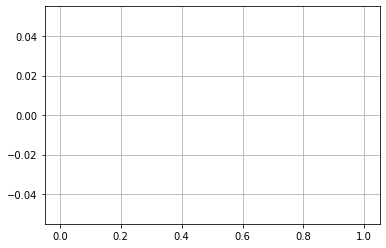

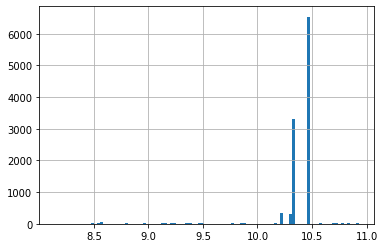

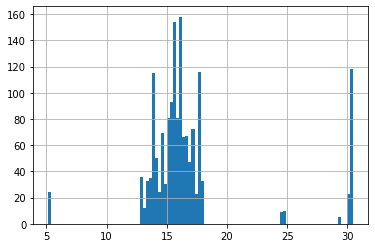

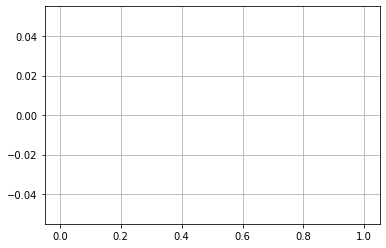

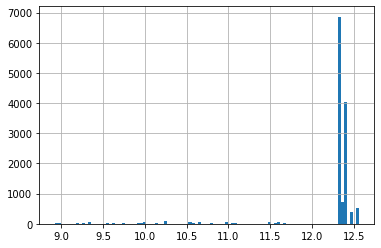

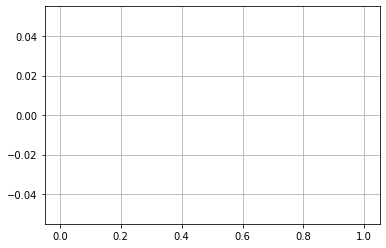

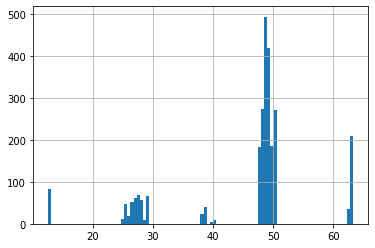

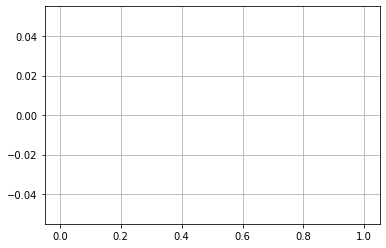

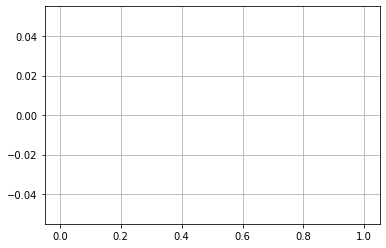

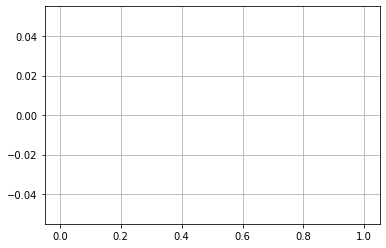

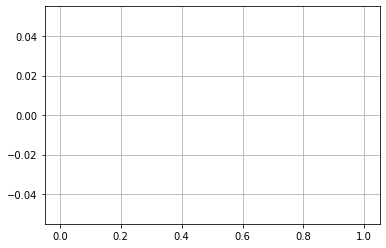

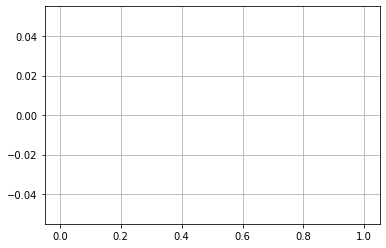

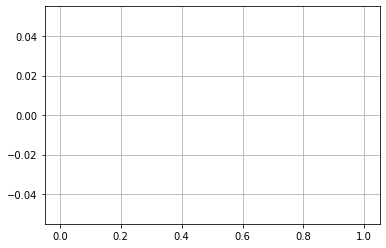

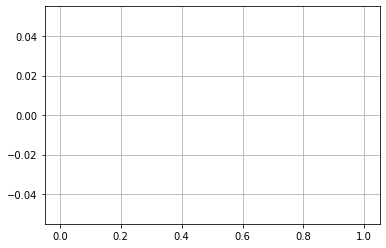

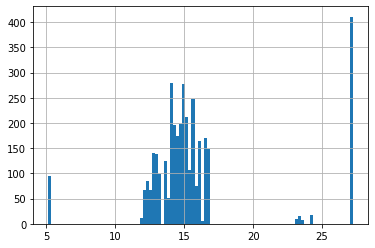

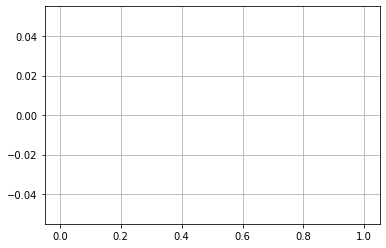

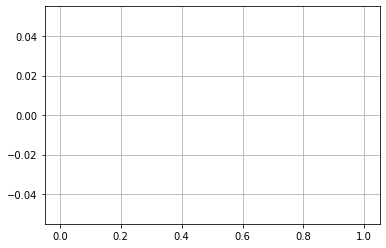

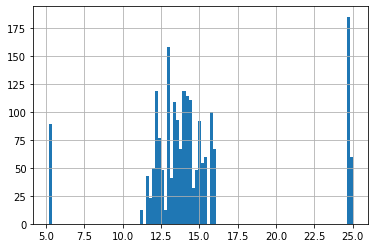

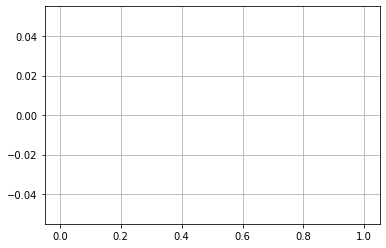

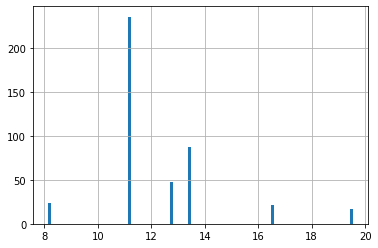

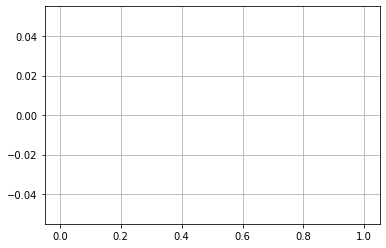

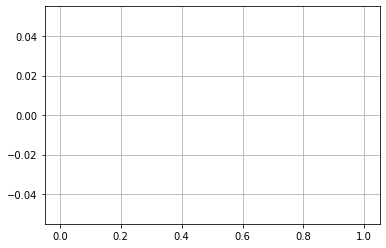

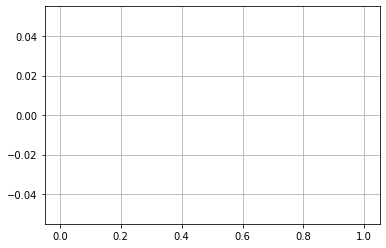

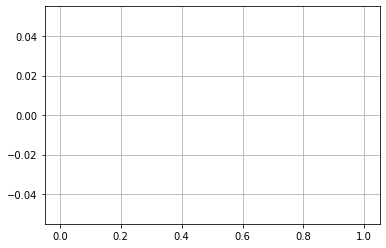

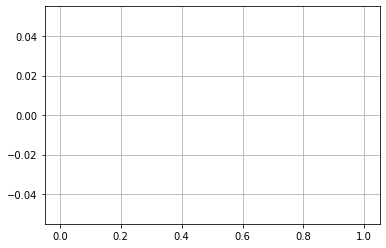

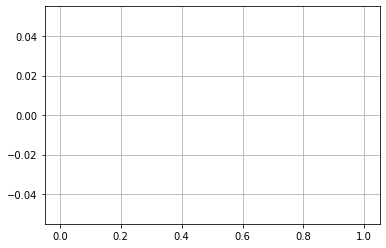

In [86]:
import matplotlib.pyplot as plt
for i in df.drug.unique():
    df.loc[(df.bin==725700)&(df.rejected==False)&(df.drug==i)&(df.type=='generic')].patient_pay.hist(bins=100)
    plt.show()

In [63]:
df.loc[(df.bin==725700)&(df.rejected==False)&(df.drug=='tanoclolol')&(df.type=='generic')].patient_pay.unique()

array([ 6.5 ,  7.39, 12.71,  5.66,  5.97,  3.47])

In [65]:
df.loc[(df.bin==725700)&(df.rejected==False)&(df.drug=='tanoclolol')&(df.type=='branded')].patient_pay.unique()

array([13.39, 11.15, 16.48, 12.71, 19.54,  6.38])

In [66]:
len(df.loc[(df.bin==725700)&(df.rejected==False)&(df.drug=='tanoclolol')&(df.type=='generic')].patient_pay)

41963

In [67]:
len(df.loc[(df.bin==725700)&(df.rejected==False)&(df.drug=='tanoclolol')&(df.type=='branded')].patient_pay)

35251

In [68]:
len(df.loc[(df.bin==725700)&(df.rejected==True)&(df.drug=='tanoclolol')&(df.type=='generic')])

0

In [69]:
len(df.loc[(df.bin==725700)&(df.rejected==True)&(df.drug=='tanoclolol')&(df.type=='branded')])

0

In [70]:
len(df.loc[(df.rejected==True)&(df.type=='branded')])

1063385

In [71]:
len(df.loc[(df.type=='branded')])

8738728

In [72]:
len(df.loc[(df.rejected==True)])

1086860

In [81]:
pd.Series(df.loc[(df.rejected==True)&(df.type=='branded')].drug.unique()).sort_values().values

array(['antimab', 'bovirol', 'brede', 'choxestamenium', 'colade',
       'colifunene', 'cuxirin', 'cycloxasonol', 'debome', 'devacin',
       'diadaric', 'dusin', 'fazipilin', 'flacelfatastat', 'flalurin',
       'fumiluric', 'genetramycicin', 'gentipapavir', 'glycogane',
       'gohevitravir', 'gosate', 'hidizuzunib', 'hivir', 'hozirol',
       'isobrovelin', 'kediborin', 'keglusited', 'lehydrome', 'mamate',
       'masonic', 'momudobatin', 'monemodiase', 'mule', 'nenizevir',
       'nephelilin', 'nicotilin', 'notin', 'nusudaric', 'pheromycin',
       'plazamiglutic', 'pranic', 'prefluflomycin', 'pucomalol', 'ratin',
       'ribosatharin', 'sacrode', 'satrade', 'semufolic', 'simarol',
       'sizubesin', 'sorine', 'spifistime', 'tafistitrisin',
       'thiostasteglume', 'tocilic', 'tocrocin', 'todiadianic',
       'tricatripride', 'tugesutin', 'vivafastat', 'vocopirin'],
      dtype=object)

In [74]:
len(df.loc[(df.rejected==True)&(df.type=='branded')].drug.unique())

61

In [85]:
len(df.loc[(df.bin==725700)&(df.rejected==True)&(df.drug=='monemodiase')&(df.type=='branded')])

1808

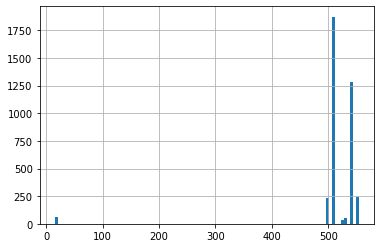

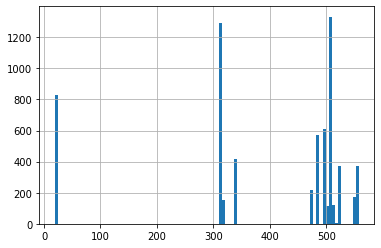

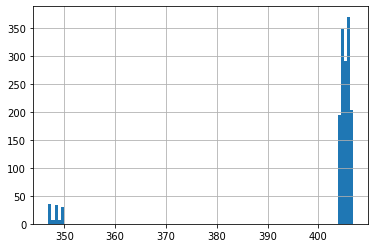

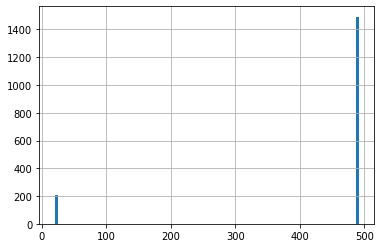

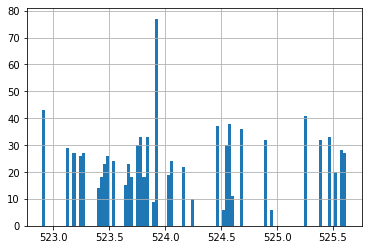

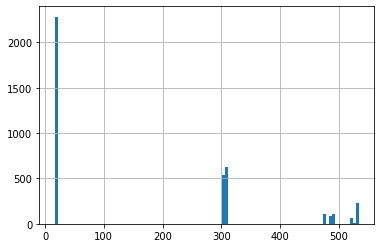

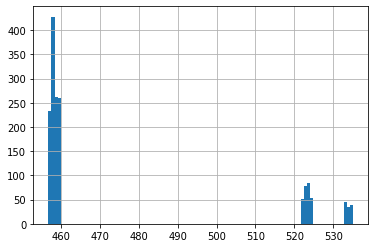

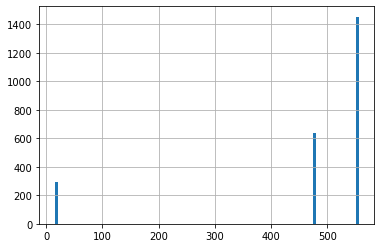

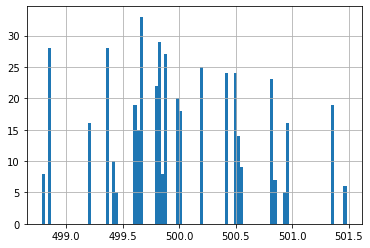

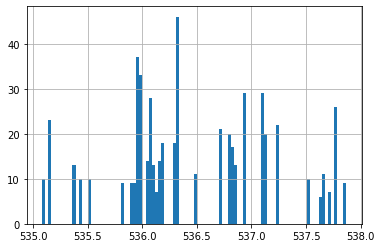

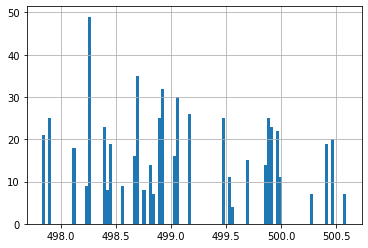

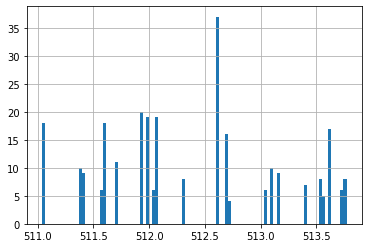

In [89]:
for i in df.bin.unique():
    df.loc[(df.bin==i)&(df.rejected==False)&(df.drug=='monemodiase')&(df.type=='branded')].patient_pay.hist(bins=100)
    plt.show()

In [92]:
for i in df.bin.unique():
    print(df.loc[(df.bin==i)].pcn.unique())

['1UQC' '327CKV' 'OO0E' 'BZ22Z2' nan '9C5MOR3']
[nan 'CS8580' 'KBOSN' 'DY4B' 'AZUO5U' 'BIZF' 'TAZ5W' 'YFVIA' 'W1LW9Y'
 'P4LC' 'T17LNK' 'TPJD' 'REGLCC' 'IF448' 'K5KDJ7G']
['KB38N' nan 'YL5CMT' 'W7L3' 'FX2Z']
['S76J7V6' '9D24']
[nan 'RAM3J' 'CG3ZWQ']
[nan '3O71UTS' 'T52GV' '3Y5ZW0' 'YICC41' '393U' '9FU70' 'ULM7G']
['MSCXSG' 'RM0HB' nan]
['NC7EN' nan 'ZQPX' 'N098KI' '6ZGS97C' 'XH4T3' 'NG4CS' '2TIC' 'MQWH09H']
['RB7UU']
['WM6A']
['J5DT8']
['7THOQ5']


In [93]:
for i in df.bin.unique():
    print(df.loc[(df.bin==i)].group.unique())

[nan 'IOEAN1DWVV3Y' 'HPVSQW7M8' 'ZOYKF0N5NEO' 'DYGBI610ZY' 'S2QKZ0OFNWS6X']
['52H8KH0F83K' 'ZX2QUWR' nan 'STGRDKR1J5RD' 'IGN6JL34H37D' 'QK6BI1N61'
 'T51T6V2E8L' 'AJK5MZ25T9IA' '0OGKQ' 'O19XSLDEFB' 'YY6B1J4E8KJ3'
 'Z01MLD4I' 'BH2Q8B3GY2GAV' 'FZPLF4O6FD' 'RGVK1' '77MAJF66DGD' 'TFZOR5R49'
 '1N5IRQ']
['6BYJBW' '7LL04USF' nan 'V96T9QL5' 'OD99VAJGWV']
[nan 'VC81HUO7ZD']
['1CAHL' '7DUPMODV0' nan]
['HO8HUGL' nan 'EVD4X5' 'MP3IQ' '0TZ9XYJZJH' 'XY5GQQ9' 'U19J4RVCA']
['DGLGRYP' 'SJVO3GXUURRGO' '9R3Z3QKDF3']
[nan 'I4UYEP84W3' 'KZWQDIHCLLHD1' '6SP1DG' 'GOM8K0' 'GQIGYFQQ2WGH'
 'XK8RM5E75ZW' '7Q756WMLLV25X']
['RS5RB3YA']
['L9QZA']
['IX6P0']
[nan]


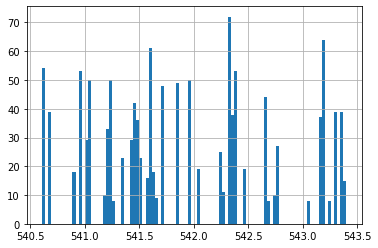

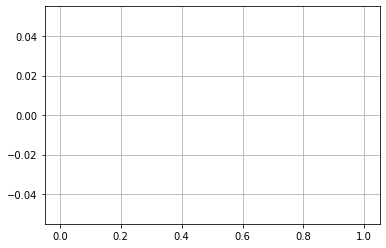

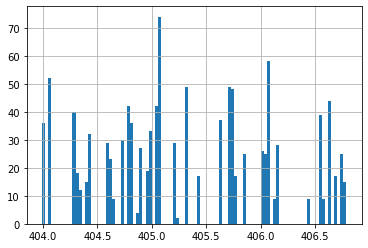

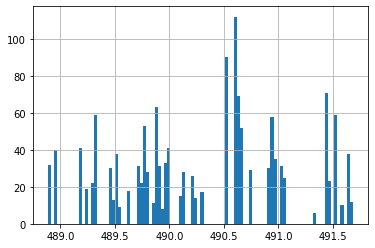

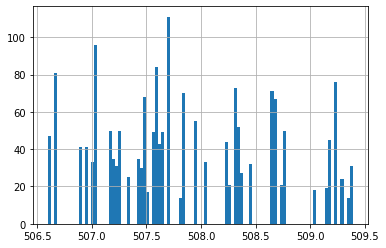

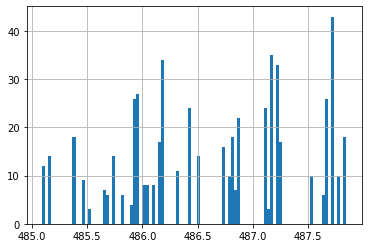

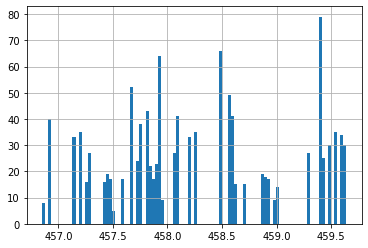

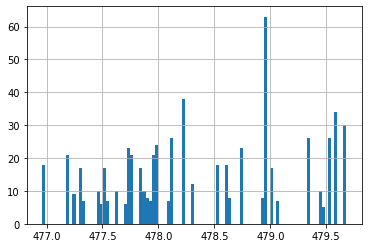

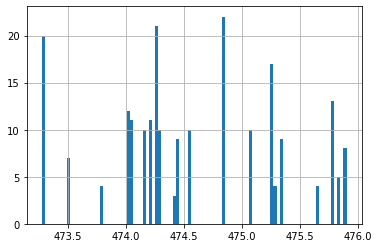

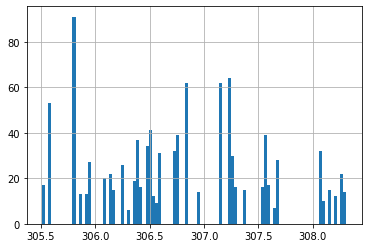

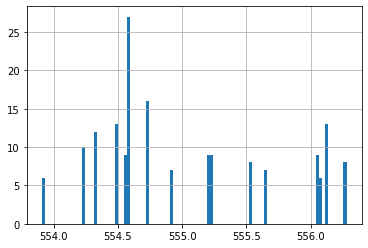

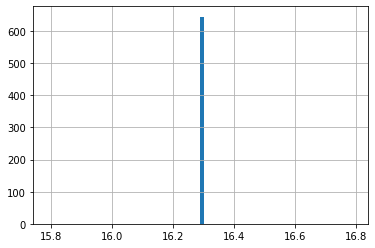

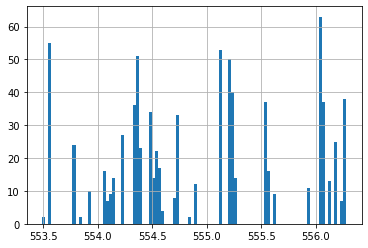

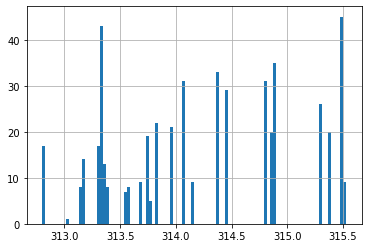

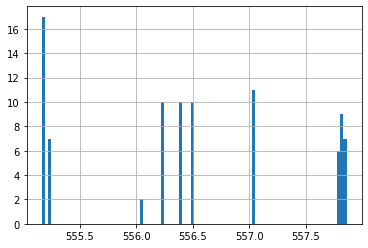

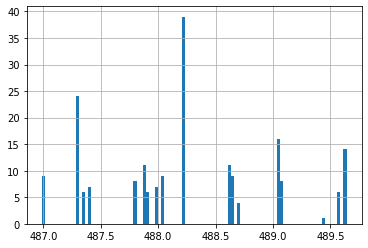

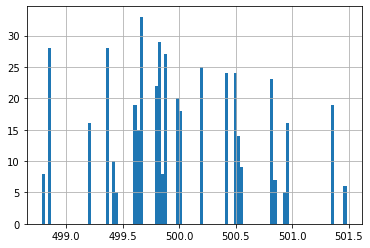

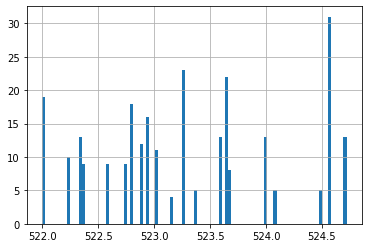

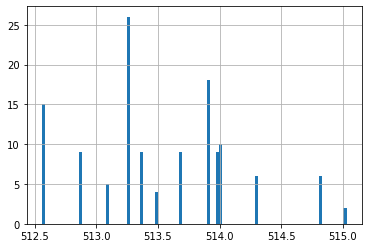

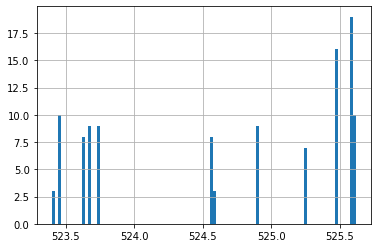

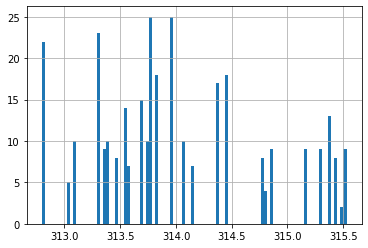

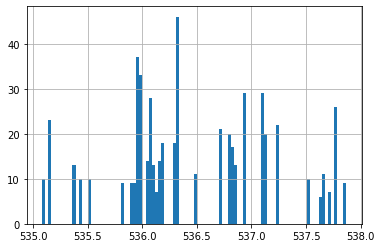

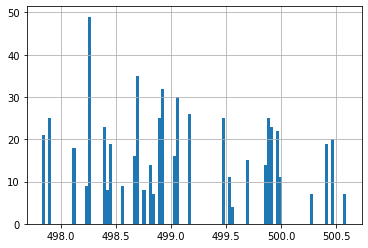

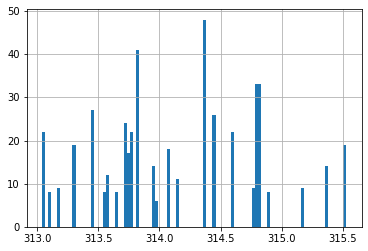

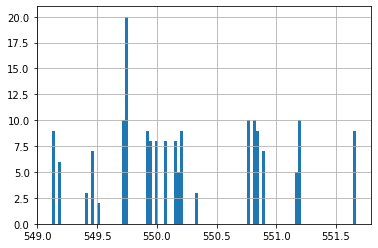

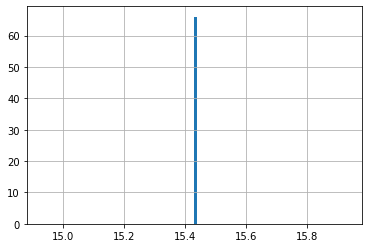

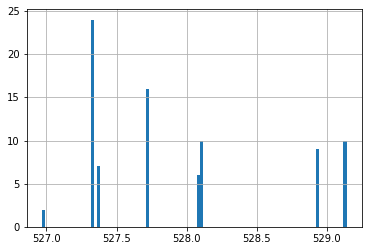

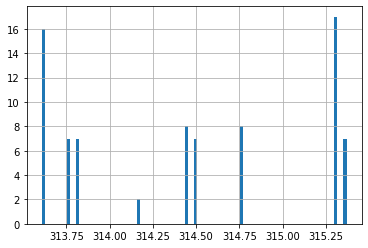

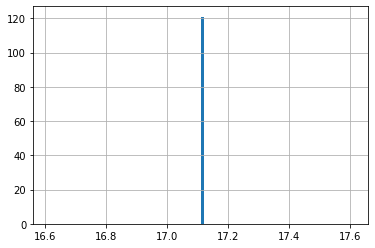

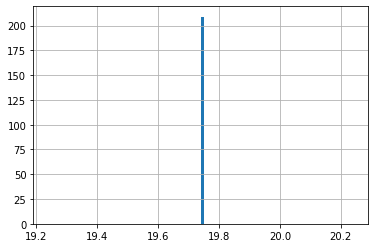

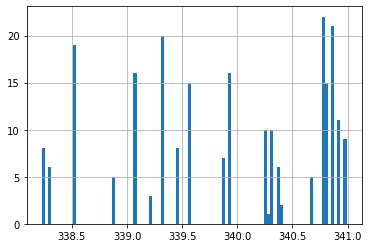

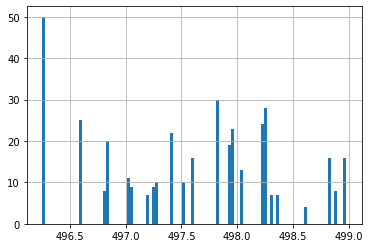

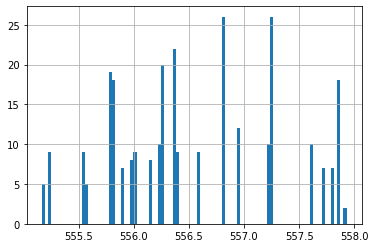

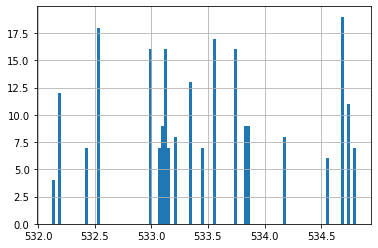

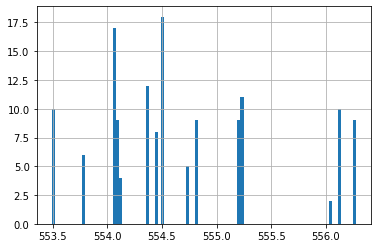

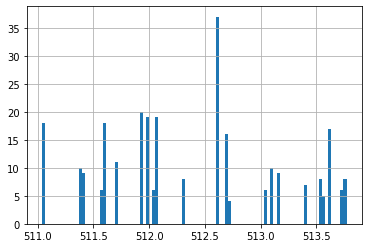

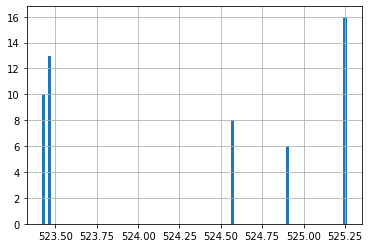

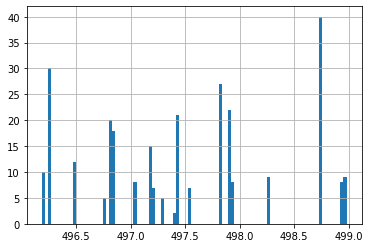

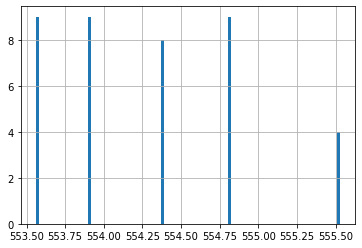

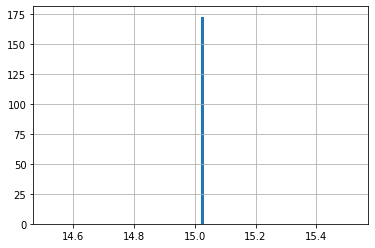

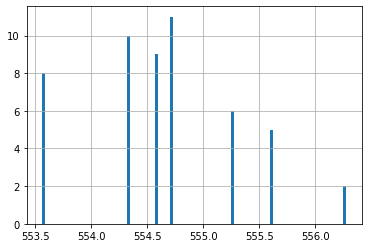

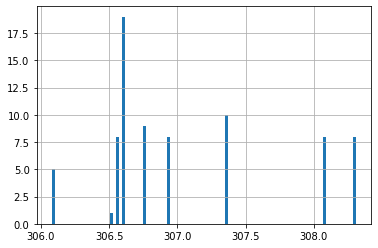

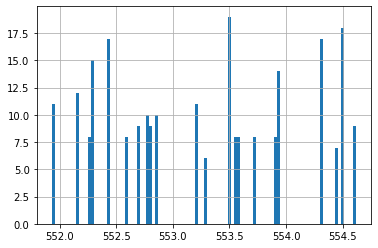

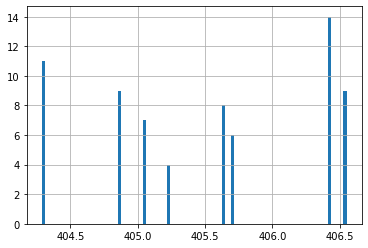

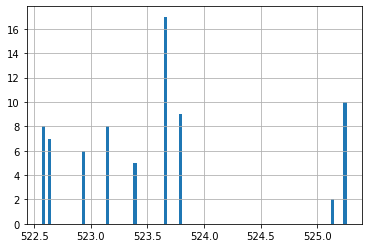

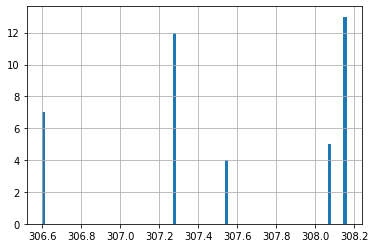

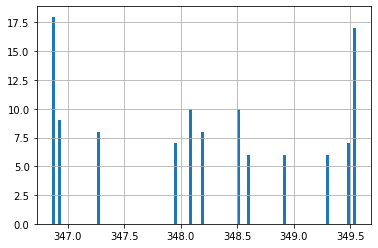

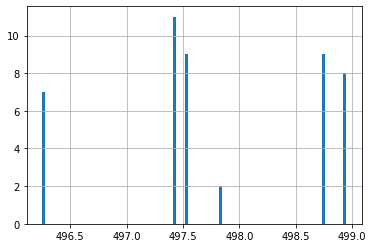

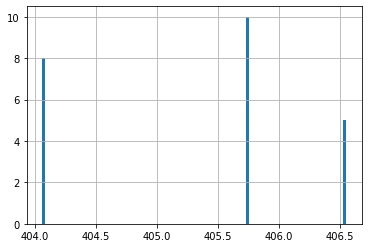

In [94]:
for i in df.pcn.unique():
    df.loc[(df.pcn==i)&(df.rejected==False)&(df.drug=='monemodiase')&(df.type=='branded')].patient_pay.hist(bins=100)
    plt.show()

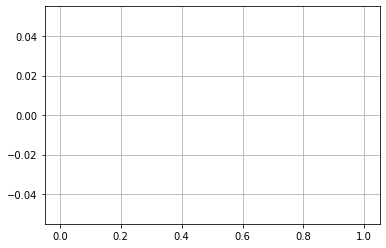

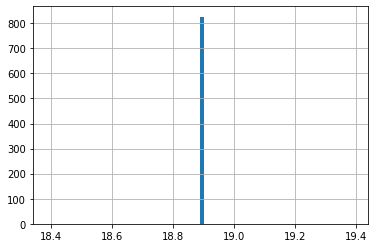

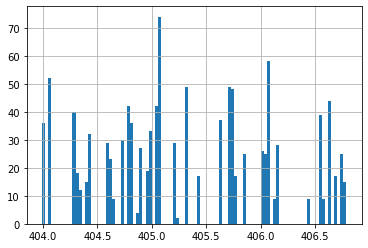

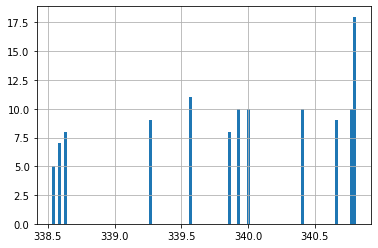

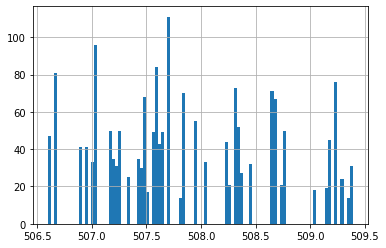

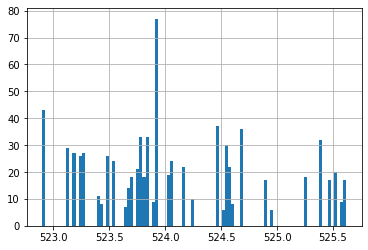

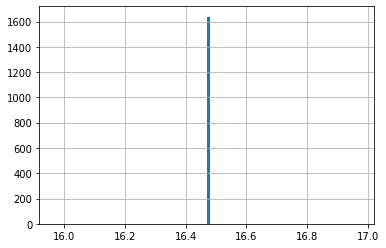

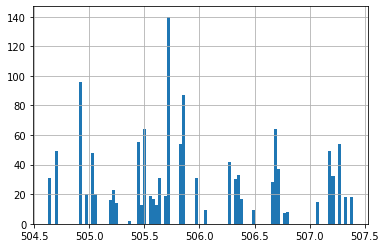

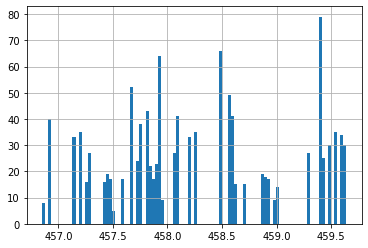

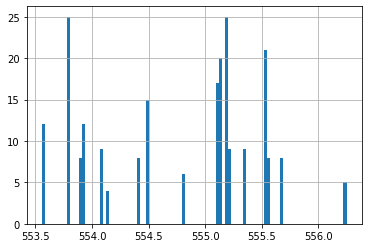

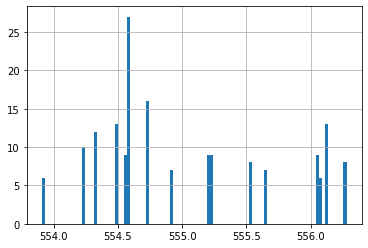

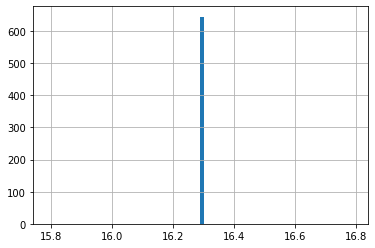

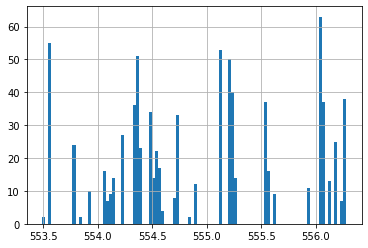

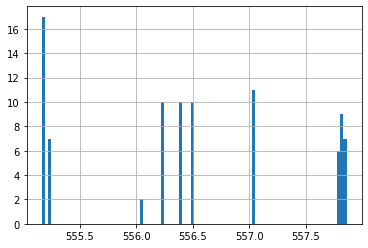

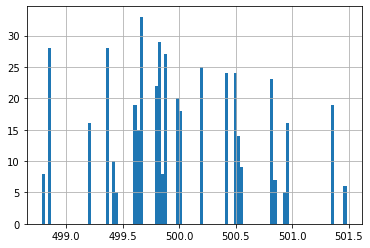

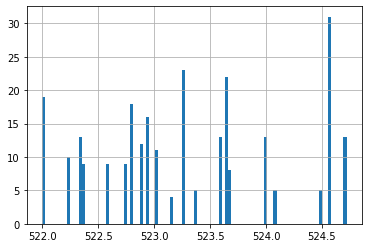

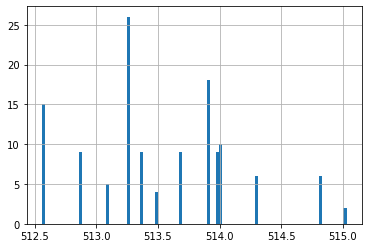

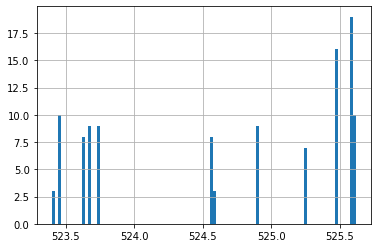

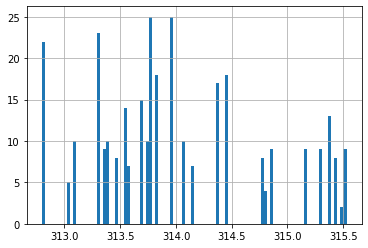

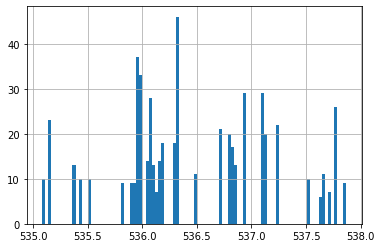

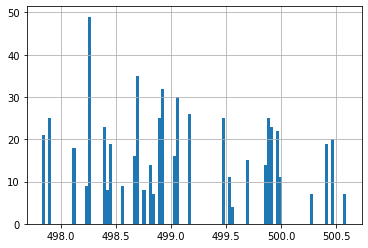

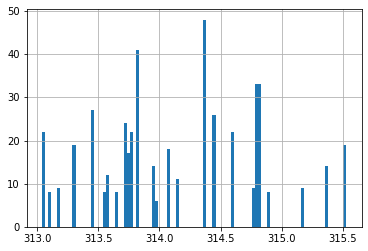

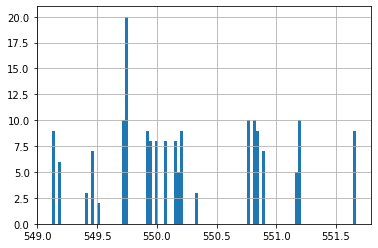

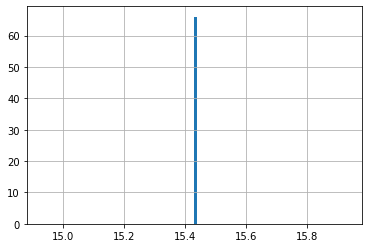

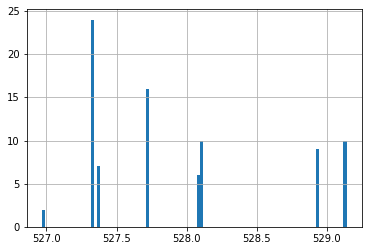

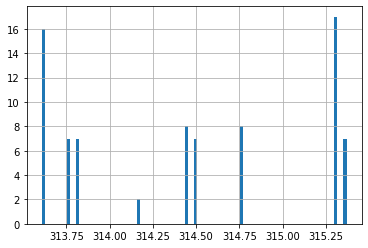

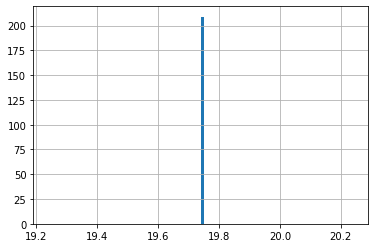

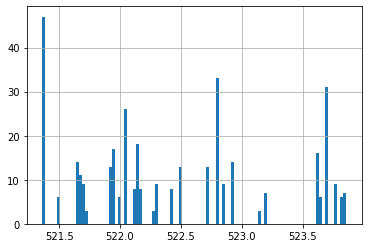

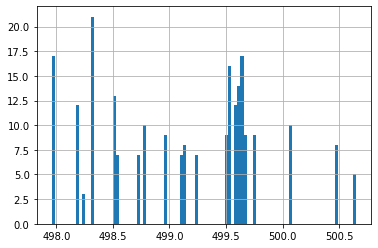

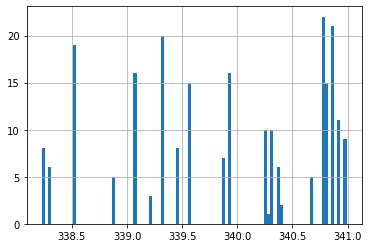

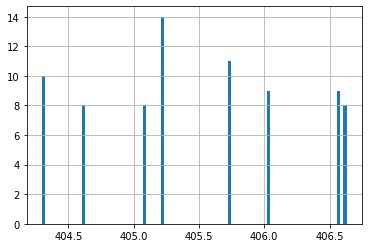

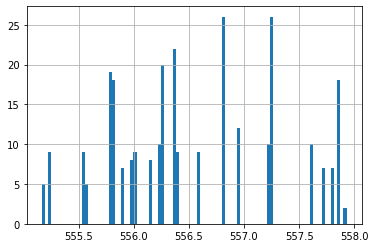

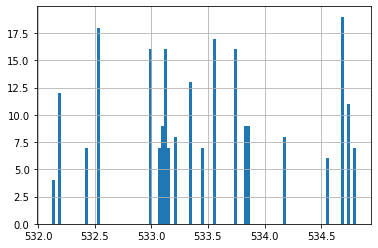

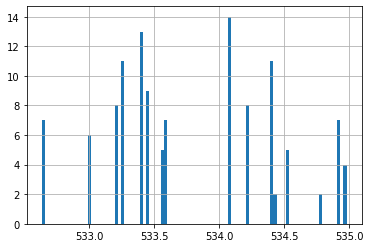

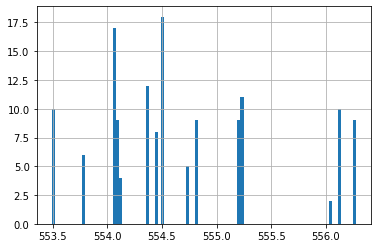

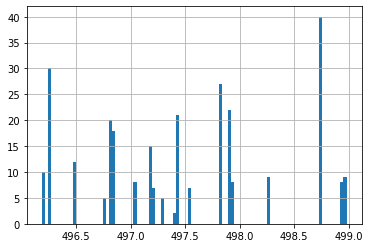

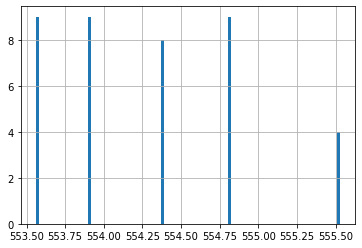

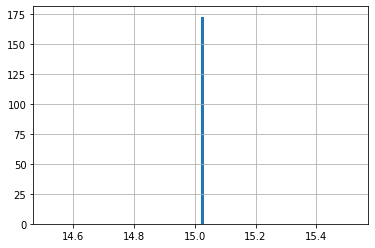

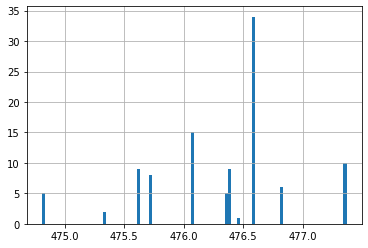

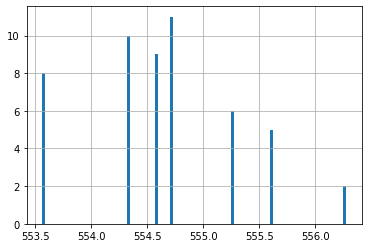

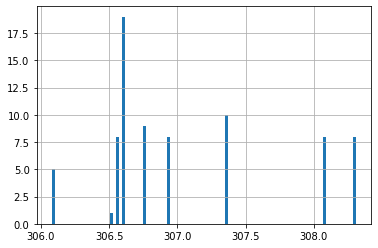

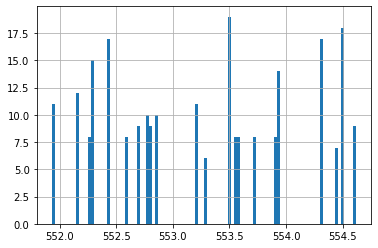

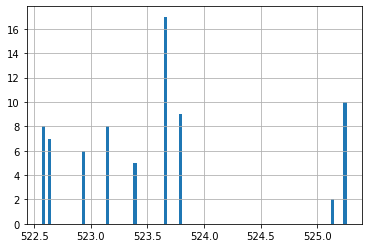

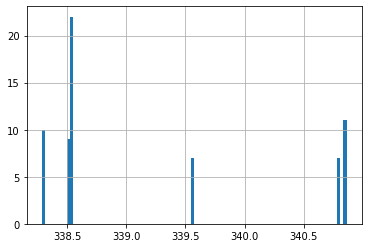

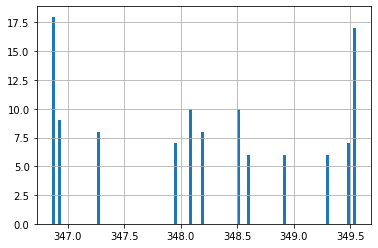

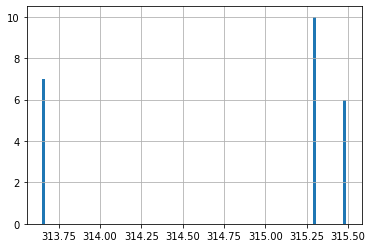

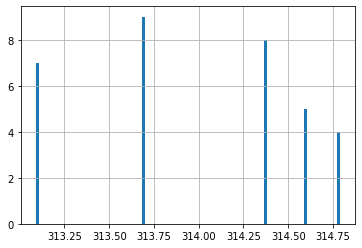

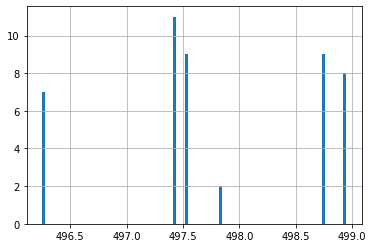

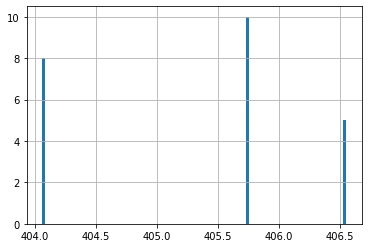

In [95]:
for i in df.group.unique():
    df.loc[(df.group==i)&(df.rejected==False)&(df.drug=='monemodiase')&(df.type=='branded')].patient_pay.hist(bins=100)
    plt.show()

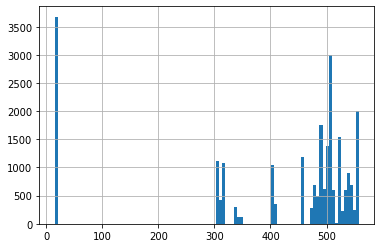

In [96]:
df.loc[(df.rejected==False)&(df.drug=='monemodiase')].patient_pay.hist(bins=100)
plt.show()

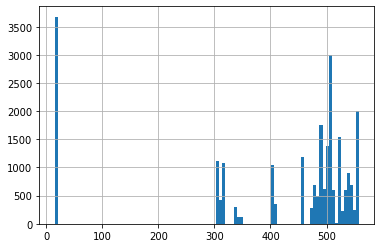

In [97]:
df.loc[(df.rejected==False)&(df.drug=='monemodiase')].patient_pay.hist(bins=100)
plt.show()

In [102]:
for i in df.bin.unique():
    print(len(df.loc[(df.bin==i)&(df.rejected==True)&(df.drug=='monemodiase')]))
#    print(len(df.loc[(df.bin==i)&(df.rejected==True)&(df.drug=='monemodiase')])/len(df.loc[(df.rejected==True)&(df.drug=='monemodiase')]))

1808
3025
744
793
449
1920
764
1142
227
241
267
118


In [103]:
for i in df.pcn.unique():
    print(len(df.loc[(df.pcn==i)&(df.rejected==True)&(df.drug=='monemodiase')]))
 #   print(len(df.loc[(df.pcn==i)&(df.rejected==True)&(df.drug=='monemodiase')])/len(df.loc[(df.rejected==True)&(df.drug=='monemodiase')]))

572
0
564
693
946
261
563
310
95
502
95
318
394
237
42
93
227
134
63
42
156
241
267
208
71
36
38
38
52
100
157
165
116
102
75
118
31
132
14
77
23
25
107
41
40
22
49
16
13


In [104]:
for i in df.group.unique():
    print(len(df.loc[(df.group==i)&(df.rejected==True)&(df.drug=='monemodiase')]))
#    print(len(df.loc[(df.group==i)&(df.rejected==True)&(df.drug=='monemodiase')])/len(df.loc[(df.rejected==True)&(df.drug=='monemodiase')]))

0
369
564
43
946
376
766
599
563
102
95
318
394
42
227
134
63
42
156
241
267
208
71
36
38
38
100
203
109
157
29
116
102
67
75
132
14
77
52
23
25
107
40
30
49
10
14
16
13


In [106]:
for i in df.bin.unique():
    print(len(df.loc[(df.bin==i)&(df.rejected==True)&(df.drug=='monemodiase')])/len(df.loc[(df.bin==i)&(df.drug=='monemodiase')]))

0.32360837658850905
0.31497292794668885
0.3281870313189237
0.31796311146752204
0.3175388967468175
0.32187761944677284
0.3271948608137045
0.32397163120567374
0.33138686131386863
0.2964329643296433
0.31046511627906975
0.29873417721518986


In [111]:
for i in df.pcn.unique():
    if len(df.loc[(df.pcn==i)&(df.drug=='monemodiase')]) !=0:
        print(len(df.loc[(df.pcn==i)&(df.rejected==True)&(df.drug=='monemodiase')])/len(df.loc[(df.pcn==i)&(df.drug=='monemodiase')]))

0.3081896551724138
0.3290548424737456
0.317162471395881
0.33557999290528556
0.3148371531966224
0.3222667429879794
0.328042328042328
0.30158730158730157
0.32387096774193547
0.35984848484848486
0.3302180685358255
0.3205858421480879
0.32157394843962006
0.32061068702290074
0.3229166666666667
0.33138686131386863
0.3333333333333333
0.3298429319371728
0.27450980392156865
0.325
0.2964329643296433
0.31046511627906975
0.2992805755395683
0.2886178861788618
0.35294117647058826
0.3114754098360656
0.3247863247863248
0.30057803468208094
0.32362459546925565
0.4005102040816326
0.296229802513465
0.2892768079800499
0.31097560975609756
0.35046728971962615
0.29873417721518986
0.36904761904761907
0.3180722891566265
0.2641509433962264
0.308
0.3108108108108108
0.24752475247524752
0.30659025787965616
0.3761467889908257
0.35714285714285715
0.3492063492063492
0.30434782608695654
0.25806451612903225
0.3611111111111111


In [112]:
for i in df.group.unique():
    if len(df.loc[(df.group==i)&(df.drug=='monemodiase')]) !=0:
        print(len(df.loc[(df.group==i)&(df.rejected==True)&(df.drug=='monemodiase')])/len(df.loc[(df.group==i)&(df.drug=='monemodiase')]))

0.3087866108786611
0.3290548424737456
0.2721518987341772
0.33557999290528556
0.31945624468988953
0.31863560732113144
0.31020196789228377
0.3222667429879794
0.3157894736842105
0.35984848484848486
0.3302180685358255
0.3205858421480879
0.32061068702290074
0.33138686131386863
0.3333333333333333
0.3298429319371728
0.27450980392156865
0.325
0.2964329643296433
0.31046511627906975
0.2992805755395683
0.2886178861788618
0.35294117647058826
0.3114754098360656
0.3247863247863248
0.32362459546925565
0.3524305555555556
0.3215339233038348
0.4005102040816326
0.27358490566037735
0.2892768079800499
0.31097560975609756
0.3602150537634409
0.35046728971962615
0.3180722891566265
0.2641509433962264
0.308
0.3333333333333333
0.3108108108108108
0.24752475247524752
0.30659025787965616
0.35714285714285715
0.3125
0.30434782608695654
0.30303030303030304
0.2978723404255319
0.25806451612903225
0.3611111111111111
